In [13]:
import pandas as pd
import numpy as np
import csv
import urllib.request
import json 
import requests
from bs4 import BeautifulSoup # Documentation: (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
import lxml.html as lh
import matplotlib.pyplot as plt

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [14]:
out_file_int = "data/data_int.txt"
list_int = [1,2,3,4,5,6]
with open(out_file_int, 'a') as outfile:
    outfile.write(str(list_int)) 
    
#!cat data/data_int.txt  --> This is the command cat for unix users
!type data\"data_int.txt" 

    
out_file_float = "data/data_float.txt"
#I create a random matrix of float from 0.5 to 10
matrix_float = np.random.uniform(low=0.5, high=10, size=25).reshape((5,5))
with open(out_file_float, 'a') as outfile:
    outfile.write(str(matrix_float)) 

!type data\"data_float.txt" 
    
read_file = pd.read_csv(r'data\data_float.txt')
read_file.to_csv(r'data\data_float.csv', index=None)

[1, 2, 3, 4, 5, 6]
[[5.33843498 8.79152135 1.41966739 4.78630183 5.65180623]
 [6.62459687 1.28387659 2.57965636 3.18259613 5.5069317 ]
 [4.98122572 9.1960981  5.66553766 1.43014767 4.65970503]
 [8.37469053 6.33829436 4.81351116 8.95372209 2.88855562]
 [1.34496904 2.16472691 7.94730807 6.39356208 2.05328904]]


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [15]:
#------The following code is not the correct answare, I need to find a way to read the file directlu with the url
#file = 'data/user_data.json'
#f = open(file)
#data = json.load(f)
#------

# Using the original url, the response of urllib is not sufficient to achieve the data since the page is not a simple
# html page with the jSON data writed inside. The data are inside a different concatenate <div> tags, I have found an other url
# in a iframe that link to the data, I have found it inspectioning the page with the browser.
# Anyway the responce is still not ready to get the data with json.loads(), because there are still <span> tags between
# (due to the html format), to delete them I have use the BeautifulSoup library. 

#url = 'https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json'
url = 'https://uca9188014640b5b722d636dc70f.previews.dropboxusercontent.com/p/html_desktop/ABW4_k6RkSUfe-pjCZV_f3zLL9_DHzG0gIWsvqWhdzw1BL5XLXr818aSCaxYyeSjIVuhQMk7KdPQt3uAoaEczDYdrtBwXhKu_xOlQ_ShH9FQhbh5Ng3hGlnW3E98Kz9xQTjbaHgSvoO1Djdag1B89226Sz3JFc1jXRr6XQH_rKgYoBY8Au9nJsN9nhVG5iITbswmzXkWV0JXfRFglieLBhJo45IROWWXvbA0K87qjoU1CjDzCHHKZD_xMU7hSHoCGtovJWSNhOvqjs3PN30d14UpKuh_lhSkON90puD5hPaeJoECHhgCQ3VeKC25bb36Efy2rTn8ETPSeIGCvYH2PUepg1LG9Nobu1I72KVgAhgvsdQ_5p0N6NBBsNIJo06ceSs/p.html'

#Extract the songtext only and save it in file
text = urllib.request.urlopen(url)

content = text.read()
soup = BeautifulSoup(content, 'lxml')

#print(soup)

#search on page for div class block songbook and extract songtext between <p>
table = soup.find_all('span')
JSONtext = ""
for item in table:
    JSONtext += item.text
    

dt_json = json.loads(JSONtext)
        
filtered_data = [x for x in dt_json if (x['CreditCardType'] == 'American Express')]
read_file = pd.DataFrame(filtered_data)
read_file.to_csv (r'data\filtered_CSV.csv', index=None)

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [16]:
def read_csv(url_csv):
    page = requests.get(url_csv)

    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

    #Create empty list
    col=[]
    i=-1
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[1]:
        i+=1
        if(i != 0):
            name=t.text_content()
            col.append((name,[]))
        
    
    #Since out first row is the header, data is stored on the second row onwards
    for j in range(2,len(tr_elements)):
    
        i=-1
    
        #Iterate through each element of the row
        for t in tr_elements[j]:
            dt = float(t.text_content())
    
            #Append the data to the empty list of the i'th column
            if (i != -1):
                col[i][1].append(dt)
                #Increment i for the next column
        
            i+=1
        
    Dict={title:column for (title,column) in col}
    df = pd.DataFrame(Dict)
    
    return df

#------The following code is not the correct answare, I need to find a way to read the file directlu with the url
#df = pd.read_csv("data/mushrooms_categorized.csv")
#------


#url_csv = "https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv"
url_mushrooms ='https://uc6a497ac8793aba0ba60392212b.previews.dropboxusercontent.com/p/html_desktop/ABXjeuEESJTIDjmRX_e9B2PFTE0x0ZJEd9_rmU5_7WKV_rs3qLnCqNiKocAxdX_PigxMjXsRCptD64nsFrev8B3XyfXOEYFkp9qb0eGR8FpzDgtjPGWZi5DcbofnMgmDBAiW8bJLm_Ymre6mj0GD2GvzNy_1wnmfy8EQHiLqp27JHW7hPzhJtQ0cBNCOHdUFO5rIim3Mo9N9hXX4PMMlBX6ZRSg8_JevKpw7rOEHxZRRWXATwe5K4A9Ta4Mz7NqQeB7-RmRp_AdD5dnv2z_d59ZPrH29G_ahuMuXe2VuZ-tVxkwo4v49egMG1dMqiWrhaHN3EPoyqxiCiJCtvNu0xaIbxtAtKWjXZ_FVAzanIOZ6FOp7TJa49R8hzLp2FYN7_p4/p.html'

df_mushrooms = read_csv(url_mushrooms)

gr_class = df_mushrooms.groupby('class').mean()
gr_class.to_json (r'data\Average_feature_JSON.json')

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [17]:
dat_file = r"data\credit_card.dat"   

CHUNK_SIZE = 6
for_count = 0  
Card_number = ""
with open(dat_file) as f:
    chunk = True
    while chunk:
        for i in range(4):
            CHUNK_SIZE = 6
            chunk = f.read(CHUNK_SIZE)
            try:
                num = int(chunk, 2)
                Card_number += str(num%9)
            except ValueError:
                print("STOP")
                break
        for_count += 1
        if(for_count == 4):
            for_count = 0
            CHUNK_SIZE = 5
            chunk = f.read(CHUNK_SIZE)
            print(Card_number)
            Card_number = ""
        else:
            chunk = f.read(CHUNK_SIZE)
            Card_number += " - "
    

1072 - 8016 - 6118 - 5514
6581 - 2571 - 6687 - 5500
5155 - 3334 - 7344 - 0085
3004 - 6306 - 6175 - 6483
3765 - 4032 - 4705 - 7175
8251 - 5351 - 2128 - 1636
8117 - 2852 - 5321 - 4441
2473 - 4543 - 0685 - 5278
8107 - 4466 - 1634 - 1433
0780 - 4161 - 7450 - 0150
4552 - 2064 - 1625 - 3333
1384 - 3403 - 8617 - 6400
3042 - 6821 - 4063 - 0610
4878 - 8787 - 1777 - 8060
0168 - 6440 - 6535 - 0267
1521 - 8344 - 4871 - 2746
1366 - 5031 - 6652 - 7533
5802 - 8577 - 4217 - 8357
4027 - 5586 - 1813 - 1442
3015 - 5810 - 3818 - 0064
0665 - 2686 - 2121 - 4673
4246 - 6604 - 4418 - 7544
5711 - 0783 - 2273 - 5602
8845 - 6838 - 5806 - 4650
6326 - 1225 - 3054 - 3358
7854 - 8472 - 2378 - 3667
1806 - 6087 - 2146 - 8121
2657 - 5007 - 3710 - 8804
3808 - 5837 - 1402 - 6843
8431 - 8831 - 4101 - 3162
5705 - 4254 - 5772 - 4776
5122 - 3062 - 0204 - 0887
8284 - 8216 - 8717 - 3871
3013 - 4337 - 7346 - 5088
8217 - 8830 - 6372 - 3230
5238 - 8734 - 2705 - 4503
8326 - 2730 - 0643 - 4205
4310 - 4778 - 6346 - 5500
2773 - 7237 

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

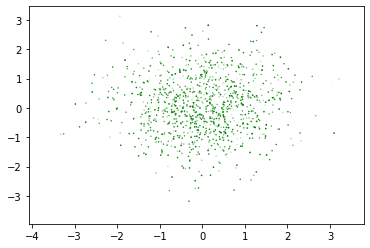

In [18]:
url_reg = 'https://ucf80e7033b2895ea1a9cd4b6324.previews.dropboxusercontent.com/p/html_desktop/ABVwc1UBkJQ1QajcQtWKzYC4KVqoy5hWHwLm7crI14jGtmBOQ5Wp5TWr29ZFmTfXy7WWCmyeCA4v6lVgQzZ-6vyIrKZSXBWMeohjn1zng1-GHf-y2NRqQtFIYsTM6IjfvmocVILqL1FQ0KvLjQzcbhebEIg6dYRDaYkrkPJyhDAF7_5HcuPVeoTHsvlBlWy3kjbi5MEVTk3NVIInS1v2NJGqvKuXT9ayhUzgby4KVDMraDsX-QTR8qpOXxMyv343HYvCHXEkod5cR_mEKrRV_gvhNwZsNbw4zBMkN6oOf6VII66-FNlehd4fm1TSsaV11M2XoikUNC5ogy_OvNzVsaJnebxREkYV59yBC1yPcPHRHQ/p.html'

df_reg = read_csv(url_reg)

plt.scatter(df_reg['features_1'], df_reg['features_2'], df_reg['features_3'], c="g", marker=".")